<a href="https://colab.research.google.com/github/Prasad-Mamidi/Machine_Learning/blob/main/Customer_Overall_Satisfaction_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree,export_text

In [2]:
#Loading the data
ecom_cust = pd.read_csv("https://raw.githubusercontent.com/Prasad-Mamidi/Machine_Learning/main/Datasets/Ecom_Cust_Survey.csv")
# Inspecting the data
ecom_cust.head()

,Cust_num,Region,Age,Order_Quantity,Customer_Type,Overall_Satisfaction
0,1,1,45,24,Prime,Dis Satisfied
1,2,0,20,75,Prime,Satisfied
2,3,0,28,70,Prime,Satisfied
3,4,0,66,28,Prime,Dis Satisfied
4,5,1,22,39,Prime,Satisfied


In [3]:
# Statistical Summary of the data
ecom_cust.describe()

,Cust_num,Region,Age,Order_Quantity
count,11805.000000,11805.000000,11805.000000,11805.000000
mean,5903.000000,0.495383,41.748751,41.227531
std,3407.954298,0.500000,13.853449,26.235388
min,1.000000,0.000000,18.000000,5.000000
25%,2952.000000,0.000000,32.000000,21.000000
50%,5903.000000,0.000000,40.000000,34.000000
75%,8854.000000,1.000000,52.000000,60.000000
max,11805.000000,1.000000,70.000000,100.000000


In [4]:
# Observe the Data types & structures of the data
# ecom_cust.dtypes
ecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11805 entries, 0 to 11804
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cust_num              11805 non-null  int64 
 1   Region                11805 non-null  int64 
 2   Age                   11805 non-null  int64 
 3   Order_Quantity        11805 non-null  int64 
 4   Customer_Type         11805 non-null  object
 5   Overall_Satisfaction  11805 non-null  object
dtypes: int64(4), object(2)
memory usage: 553.5+ KB


In [5]:
#missing values
ecom_cust.isnull().sum()

,0
Cust_num,0
Region,0
Age,0
Order_Quantity,0
Customer_Type,0
Overall_Satisfaction,0


Text(0.5, 1.0, 'Overall Satisfaction')

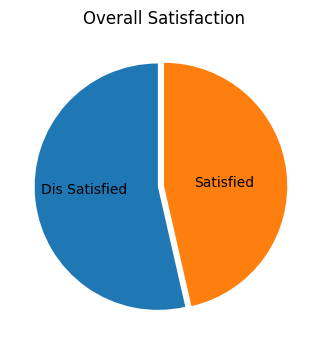

In [6]:
x = ecom_cust.groupby(["Overall_Satisfaction"]).sum()["Cust_num"]
fig , axes = plt.subplots(figsize=(4,4))
plt.pie(x,explode = [0.05,0],labels=["Dis Satisfied","Satisfied"],startangle=90,labeldistance=0.25)
plt.title("Overall Satisfaction")

In [7]:
#Data Consistency
ecom_cust["Age"].unique()

array([45, 20, 28, 66, 22, 19, 37, 57, 39, 21, 32, 43, 30, 69, 33, 36, 44,
       46, 42, 35, 59, 25, 40, 58, 47, 29, 49, 41, 31, 34, 24, 23, 38, 67,
       63, 55, 54, 52, 65, 56, 27, 53, 62, 51, 50, 48, 18, 64, 68, 60, 26,
       70, 61])

In [8]:
ecom_cust["Region"].unique()

array([1, 0])

In [9]:
ecom_cust["Order_Quantity"].unique()

array([ 24,  75,  70,  28,  39,  50,  74,  22,  58,  34,   6,  20,  73,
        10,  38,  41,  47,  77,  19,  30,  35,  80,  52,  37,  33,  12,
         9,  16,  55,  48,  59,  49,  29,   7,  21,  64,  79,  27,  66,
        71,  91,  31,  94,  17,  97,  32,  46,  63,  13,  83,  62,  60,
        23,  40,  56,  18,  67,   5,  44,  57,  72,  53,  96,  11,  86,
        26,  25,  90,  65,  43,  14,  93,  76,  95,  54,  15, 100,  69,
        92,  61,  81,  84,  68,  98,  36,  45,   8,  89,  78,  88,  85,
        51,  82,  87,  42,  99])

In [10]:
# Duplication
ecom_cust.duplicated().sum()

0

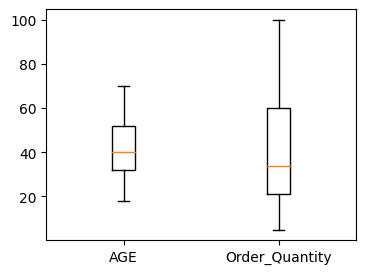

In [11]:
#Outliers detection
plt.subplots(figsize=(4,3))
plt.boxplot(ecom_cust.iloc[:,2:4])
plt.gca().set_xticklabels(["AGE","Order_Quantity"])
plt.show()

In [12]:
#label encoding
ecom_cust["Customer_Type_Num"] = ecom_cust["Customer_Type"].map({"Prime":1,"Non_Prime":0})
ecom_cust["Overall_Satisfaction_Num"]=ecom_cust["Overall_Satisfaction"].map({"Satisfied":1,"Dis Satisfied":0})

In [13]:
ecom_cust.head()

,Cust_num,Region,Age,Order_Quantity,Customer_Type,Overall_Satisfaction,Customer_Type_Num,Overall_Satisfaction_Num
0,1,1,45,24,Prime,Dis Satisfied,1,0
1,2,0,20,75,Prime,Satisfied,1,1
2,3,0,28,70,Prime,Satisfied,1,1
3,4,0,66,28,Prime,Dis Satisfied,1,0
4,5,1,22,39,Prime,Satisfied,1,1


In [14]:
ecom_cust.drop(columns=["Customer_Type","Overall_Satisfaction"],inplace=True)

In [15]:
ecom_cust.head()

,Cust_num,Region,Age,Order_Quantity,Customer_Type_Num,Overall_Satisfaction_Num
0,1,1,45,24,1,0
1,2,0,20,75,1,1
2,3,0,28,70,1,1
3,4,0,66,28,1,0
4,5,1,22,39,1,1


In [16]:
features = ["Region","Age","Order_Quantity","Customer_Type_Num"]
X = ecom_cust[features]
y = ecom_cust["Overall_Satisfaction_Num"]
DTC = tree.DecisionTreeClassifier(max_depth=2)
DTC.fit(X,y)

DecisionTreeClassifier(max_depth=2)

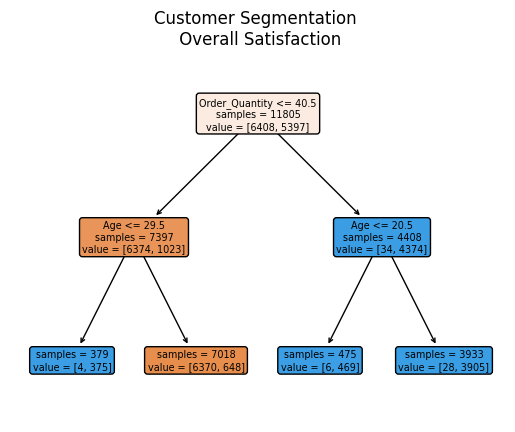

In [17]:
plot_tree(DTC,feature_names=features,filled=True,rounded = True,impurity=False)
plt.title("Customer Segmentation \n Overall Satisfaction")
# plt.savefig("C:/Users/HP/Desktop/j.jpg",dpi=1200)
plt.show()

In [18]:
print(export_text(DTC,feature_names=features))

|--- Order_Quantity <= 40.50
|   |--- Age <= 29.50
|   |   |--- class: 1
|   |--- Age >  29.50
|   |   |--- class: 0
|--- Order_Quantity >  40.50
|   |--- Age <= 20.50
|   |   |--- class: 1
|   |--- Age >  20.50
|   |   |--- class: 1



In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay

In [21]:
y_pred = DTC.predict(X)
cm = confusion_matrix(y,y_pred)
print(cm)

[[6370   38]
 [ 648 4749]]


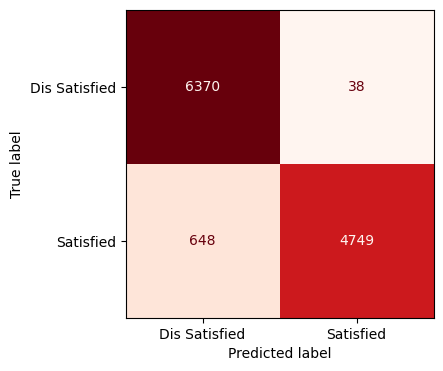

In [29]:
fig , ax = plt.subplots(figsize=(4,4))
ConfusionMatrixDisplay(cm,display_labels=["Dis Satisfied","Satisfied"]).plot(ax=ax,cmap="Reds",colorbar=False)
plt.show()

In [34]:
#Accuracy
# print(accuracy_score(y,y_pred))
print(f"Accuracy:{(cm[0,0]+cm[1,1])/cm.sum()}")
#miscalculation rate
print(f"MisCalculation Rate: {(cm[0,1]+cm[1,0])/cm.sum()}")

Accuracy:0.9418890300720034
MisCalculation Rate: 0.05811096992799661
